In [29]:
import pandas as pd

df = pd.read_csv('data/시도별사교육참여율.csv')
df.head(),df['시도별'].unique()

(     시도별    시점  평  균 (%)
 0  서울특별시  2009      79.6
 1  서울특별시  2010      77.5
 2  서울특별시  2011      77.0
 3  서울특별시  2012      73.5
 4  서울특별시  2013      75.0,
 array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
        '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도',
        '경상북도', '경상남도', '제주특별자치도'], dtype=object))

In [30]:
df['시점'] = pd.to_datetime(df['시점'], format='%Y').dt.year
df = df.groupby(['시점', '시도별'], as_index=False)['평  균 (%)'].sum()

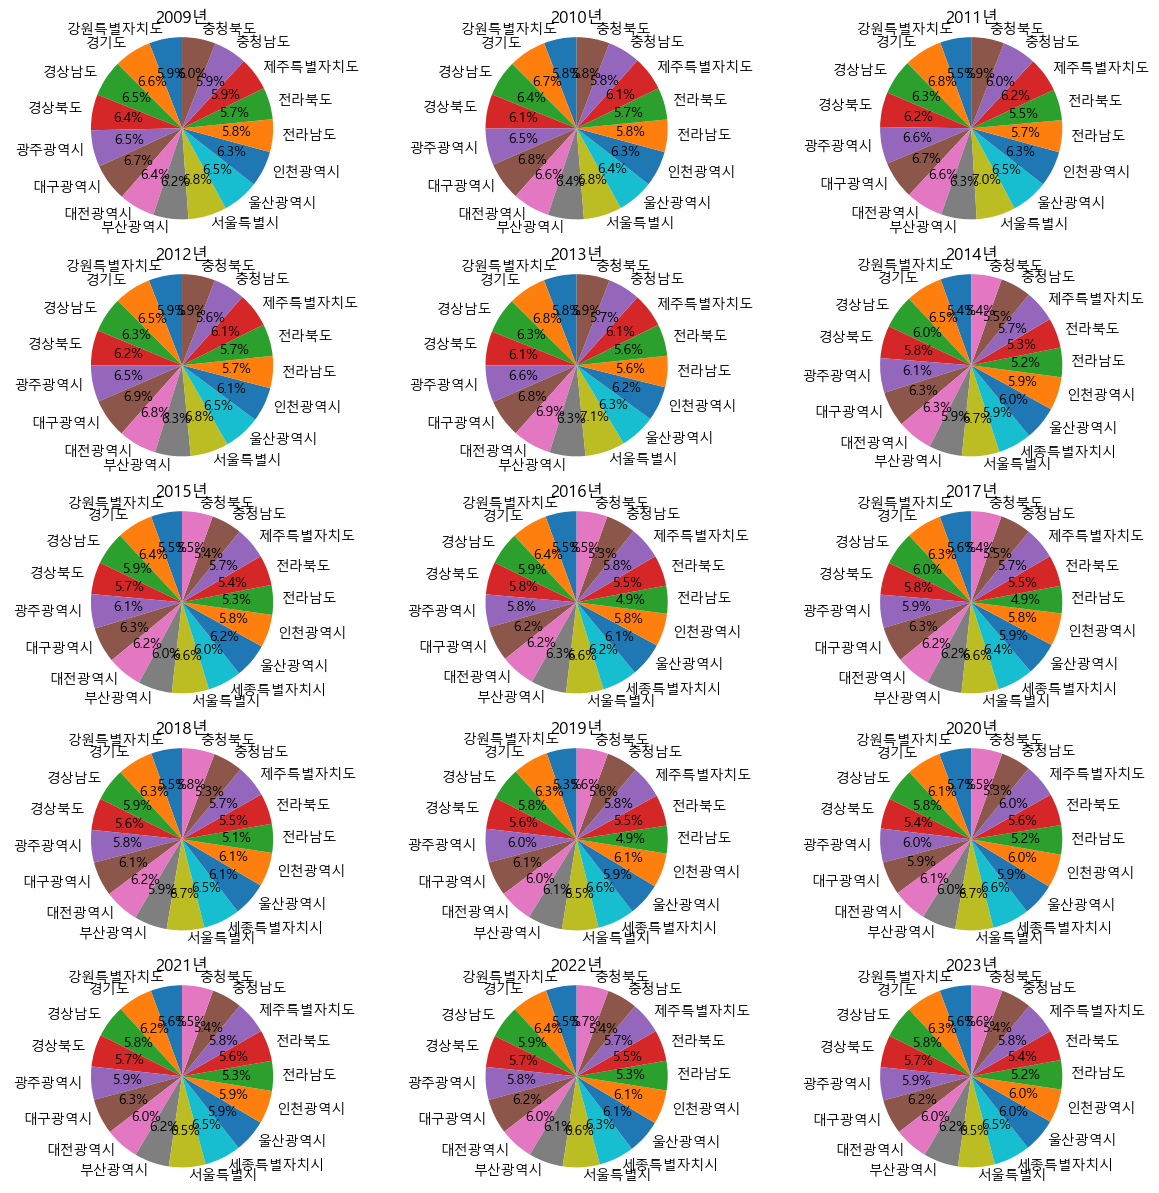

In [31]:
import matplotlib.pyplot as plt

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 고유한 시점 리스트
time_points = df['시점'].unique()

# 서브플롯 설정
num_plots = len(time_points)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # 필요한 행 수 계산

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# 각 시점에 대해 파이 차트 생성
for i, time in enumerate(time_points):
    region_counts = df[df['시점'] == time].set_index('시도별')['평  균 (%)']
    
    # 파이 차트 생성
    ax = axes[i // ncols, i % ncols]  # 현재 위치 지정
    ax.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{time}년')  # 년도만 표시
    ax.axis('equal')  # 원형 차트로 보이게 설정

# 나머지 서브플롯은 빈 화면으로 유지
for j in range(num_plots, nrows * ncols):
    axes[j // ncols, j % ncols].axis('off')  # 해당 서브플롯 숨김

plt.tight_layout()
plt.show()

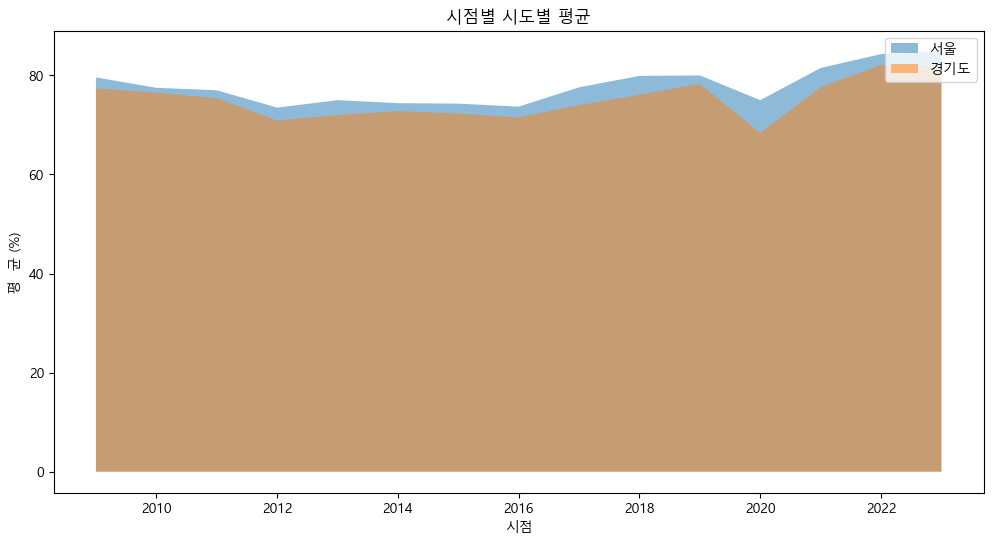

In [32]:
# 피벗 테이블 생성
pivot_df = df.pivot(index='시점', columns='시도별', values='평  균 (%)')

# 영역 차트
plt.subplots(figsize=(12, 6))
plt.fill_between(pivot_df.index, pivot_df['서울특별시'], label='서울', alpha=0.5)
plt.fill_between(pivot_df.index, pivot_df['경기도'], label='경기도', alpha=0.5)

plt.title('시점별 시도별 평균')
plt.xlabel('시점')
plt.ylabel('평  균 (%)')
plt.legend()

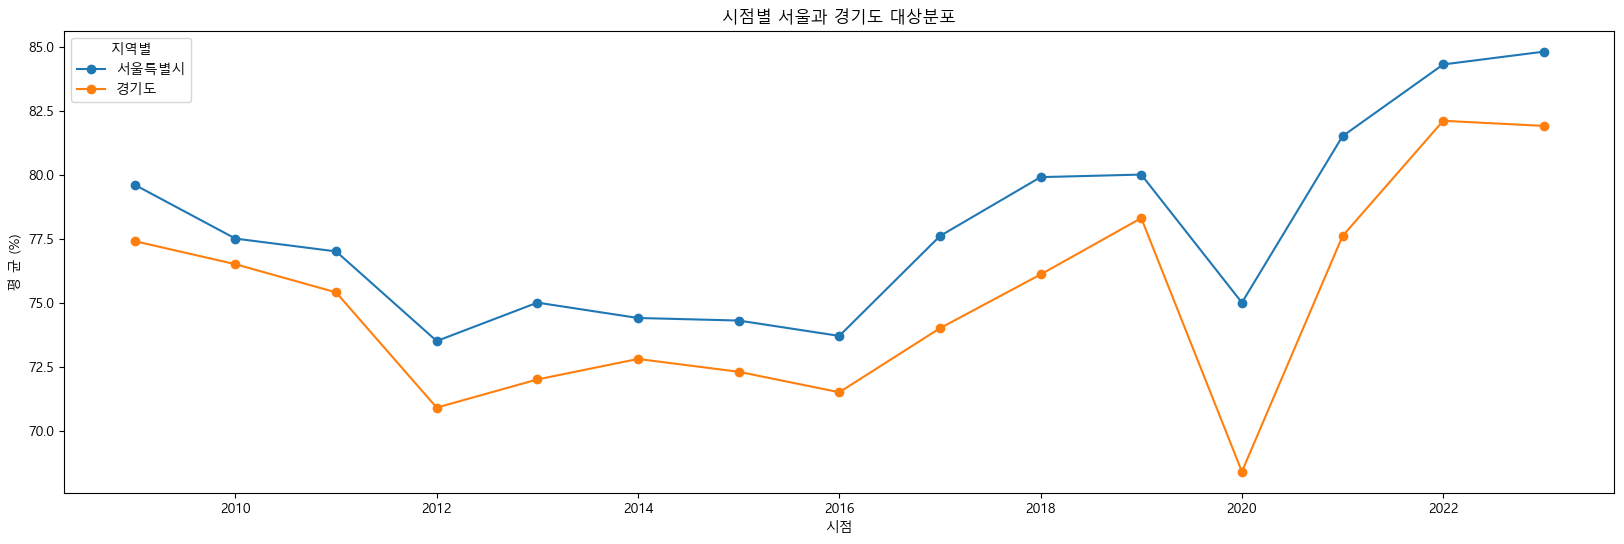

In [33]:
# 라인 차트
plt.figure(figsize=(20, 6))

selected_columns = ['서울특별시', '경기도']
filtered_df = pivot_df[selected_columns]

for column in filtered_df.columns:
    plt.plot(filtered_df.index, filtered_df[column], marker='o', label=column)

plt.title('시점별 서울과 경기도 대상분포')
plt.xlabel('시점')
plt.ylabel('평 균 (%)')
plt.xticks(rotation=0)
plt.legend(title='지역별')

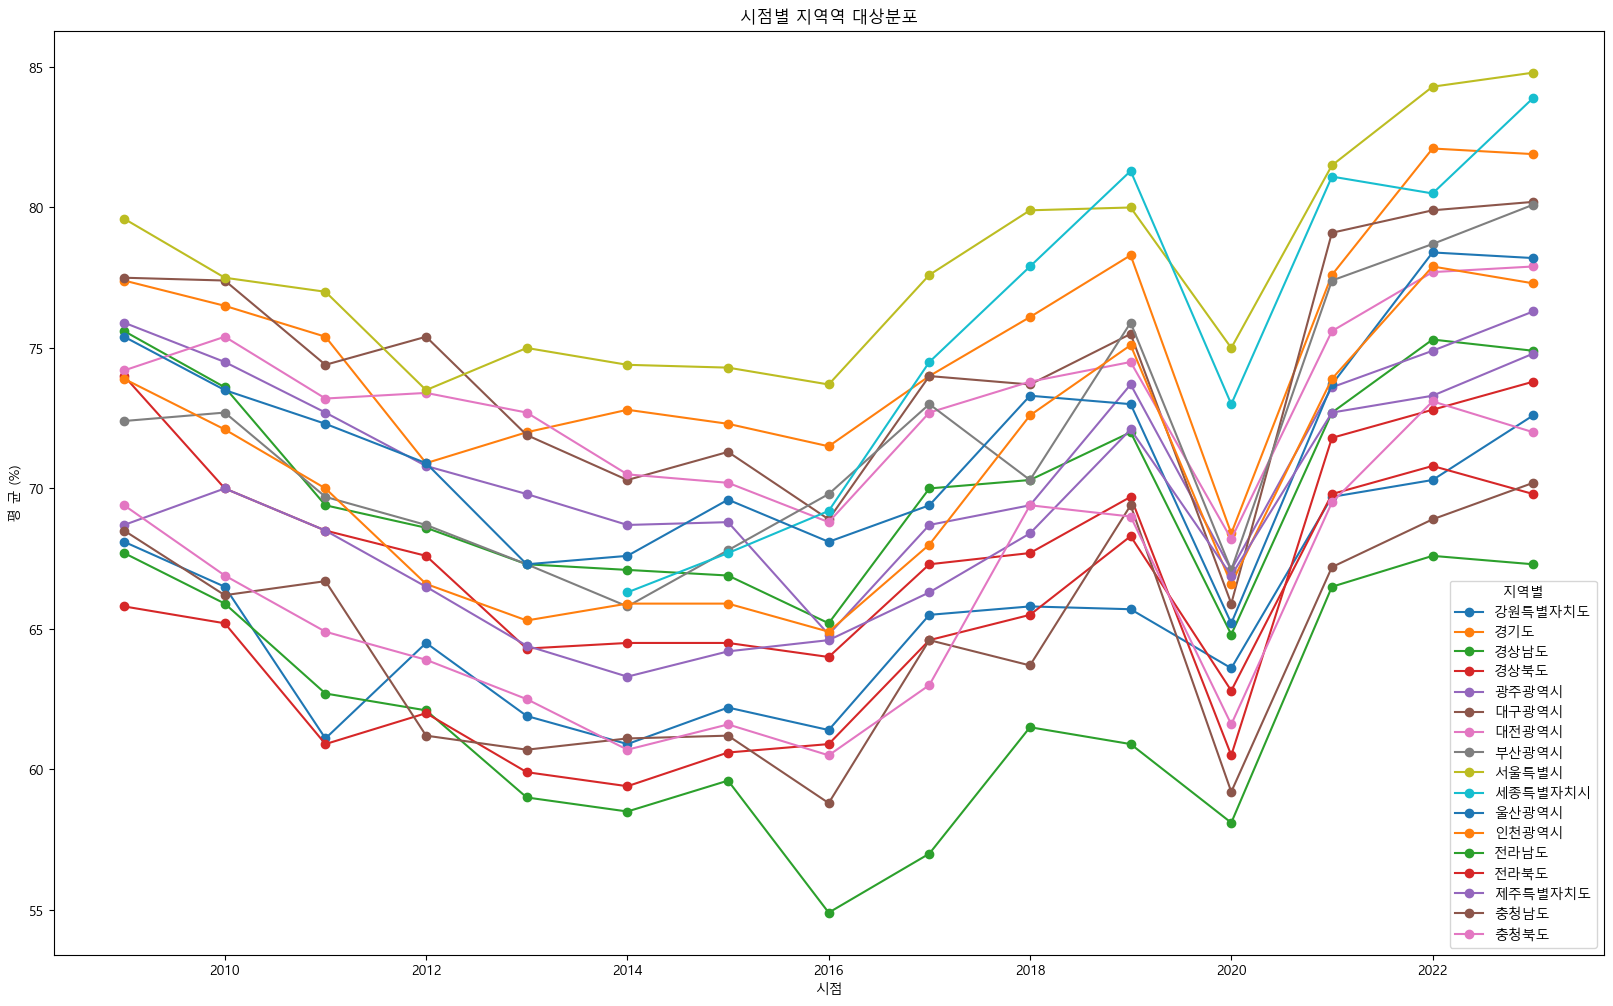

In [34]:
# 라인 차트
plt.figure(figsize=(20, 12))

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

plt.title('시점별 지역역 대상분포')
plt.xlabel('시점')
plt.ylabel('평 균 (%)')
plt.xticks(rotation=0)
plt.legend(title='지역별')

In [35]:
df.rename(columns={'시도별': '지역별', '평  균 (%)': '사교육참여율'}, inplace=True)
df['지역별'] = df['지역별'].replace('서울특별시', '서울')
df['지역별'] = df['지역별'].replace(['부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시'], '광역시')
df['지역별'] = df['지역별'].replace(['세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'], '대도시외')
df.head(),df['지역별'].unique()

(     시점   지역별  사교육참여율
 0  2009  대도시외    68.1
 1  2009  대도시외    77.4
 2  2009  대도시외    75.6
 3  2009  대도시외    74.0
 4  2009   광역시    75.9,
 array(['대도시외', '광역시', '서울'], dtype=object))

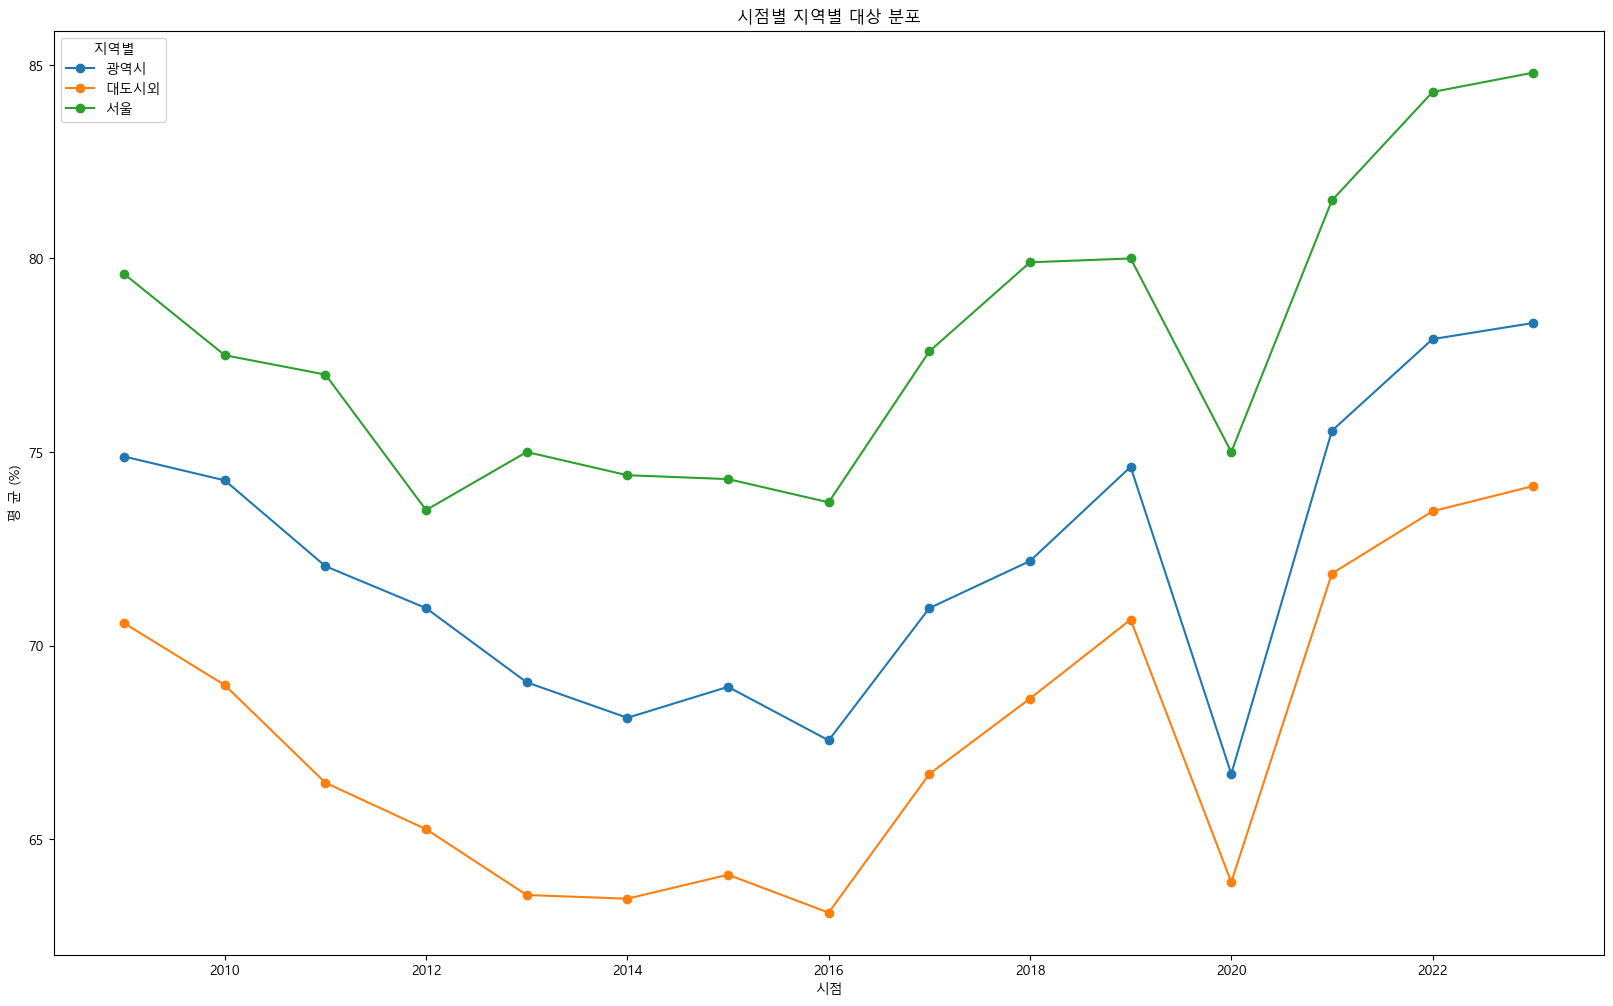

In [36]:
# 피벗 테이블 생성 (중복 처리)
pivot_df2 = df.pivot_table(index='시점', columns='지역별', values='사교육참여율', aggfunc='mean')

# 라인 차트
plt.figure(figsize=(20, 12))

for column in pivot_df2.columns:
    plt.plot(pivot_df2.index, pivot_df2[column], marker='o', label=column)

plt.title('시점별 지역별 대상 분포')
plt.xlabel('시점')
plt.ylabel('평 균 (%)')
plt.xticks(rotation=0)
plt.legend(title='지역별')
plt.show()

In [37]:
# 데이터 저장
df.to_csv('시도별사교육참여율(년도).csv', index=False)